<a href="https://colab.research.google.com/github/mngugi/ML_Cybersec/blob/main/markovprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pyfiglet # type: ignore

def display_title(title):
    ascii_art = pyfiglet.figlet_format(title)
    print(ascii_art)

if __name__ == "__main__":
    display_title("Markov Process")

# Initial state distribution
X_0 = np.array([0.6, 0.1, 0.2, 0.1])

# Transition matrix
P = np.array([
    [0.7, 0.2, 0.05, 0.05],
    [0.3, 0.4, 0.2, 0.1],
    [0.1, 0.3, 0.5, 0.1],
    [0.2, 0.2, 0.3, 0.3]
])

# Function to evolve state
def evolve_state(X, P, steps):
    for _ in range(steps):
        X = np.dot(X, P)
    return X

# Evolve the state for 5 time steps
steps = 5
X_t = evolve_state(X_0, P, steps)

print(f"State distribution after {steps} steps:")
print(X_t)

# Calculate system resilience
resilience = X_t[0]  # Assuming resilience is associated with state S_0
print(f"System resilience: {resilience}")


 __  __            _                ____                              
|  \/  | __ _ _ __| | _______   __ |  _ \ _ __ ___   ___ ___  ___ ___ 
| |\/| |/ _` | '__| |/ / _ \ \ / / | |_) | '__/ _ \ / __/ _ \/ __/ __|
| |  | | (_| | |  |   < (_) \ V /  |  __/| | | (_) | (_|  __/\__ \__ \
|_|  |_|\__,_|_|  |_|\_\___/ \_/   |_|   |_|  \___/ \___\___||___/___/
                                                                      

State distribution after 5 steps:
[0.41897525 0.27527775 0.20742925 0.09831775]
System resilience: 0.4189752499999999


In [2]:
import numpy as np

# Transition matrix
P = np.array([
    [0.8, 0.2],
    [0.4, 0.6]
])

# Initial state distribution (Sunny)
X_0 = np.array([1, 0])

# Function to evolve state
def evolve_state(X, P, steps):
    for _ in range(steps):
        X = np.dot(X, P)
    return X

# Evolve the state for 5 time steps
steps = 5
X_t = evolve_state(X_0, P, steps)
print(f"State distribution after {steps} steps:")
print(X_t)

# Find steady-state distribution
eigenvalues, eigenvectors = np.linalg.eig(P.T)
steady_state = eigenvectors[:, np.isclose(eigenvalues, 1)]

# Normalize the steady-state distribution
steady_state = steady_state / np.sum(steady_state)
steady_state = steady_state.real
print("Steady-state distribution:")
print(steady_state)


State distribution after 5 steps:
[0.67008 0.32992]
Steady-state distribution:
[[0.66666667]
 [0.33333333]]


In [3]:
import numpy as np

# Transition matrix
P = np.array([
    [0.7, 0.1, 0.1, 0.1],
    [0.2, 0.5, 0.1, 0.2],
    [0.1, 0.2, 0.6, 0.1],
    [0.1, 0.3, 0.2, 0.4]
])

# Initial state distribution
X_0 = np.array([0.4, 0.3, 0.2, 0.1])

# Function to evolve state
def evolve_state(X, P, steps):
    for _ in range(steps):
        X = np.dot(X, P)
    return X

# Evolve the state for 10 time steps
steps = 10
X_t = evolve_state(X_0, P, steps)
print(f"State distribution after {steps} steps:")
print(X_t)

# Find steady-state distribution
eigenvalues, eigenvectors = np.linalg.eig(P.T)
steady_state = eigenvectors[:, np.isclose(eigenvalues, 1)]

# Normalize the steady-state distribution
steady_state = steady_state / np.sum(steady_state)
steady_state = steady_state.real
print("Steady-state distribution:")
print(steady_state)


State distribution after 10 steps:
[0.31688266 0.26619493 0.2360702  0.18085221]
Steady-state distribution:
[[0.31658291]
 [0.26633166]
 [0.2361809 ]
 [0.18090452]]


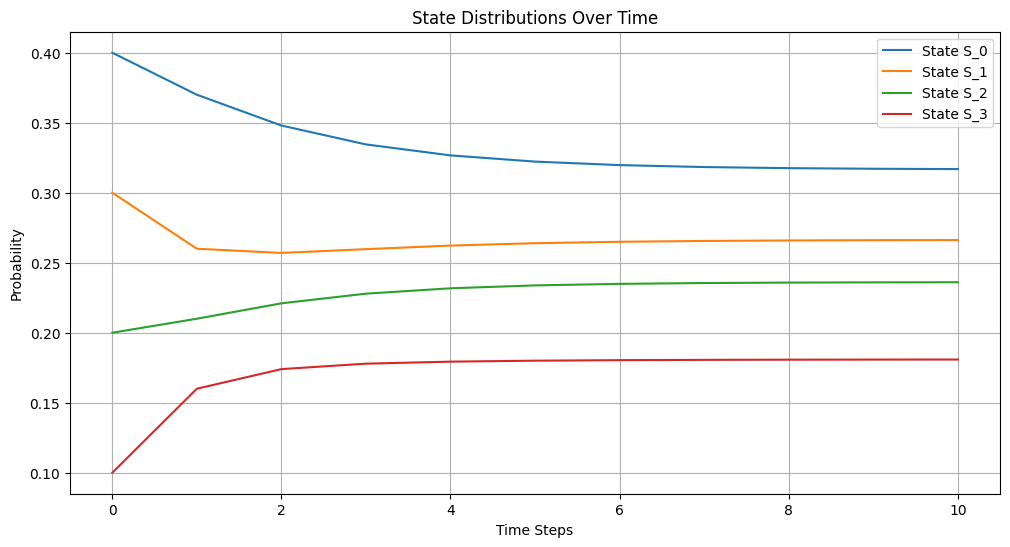

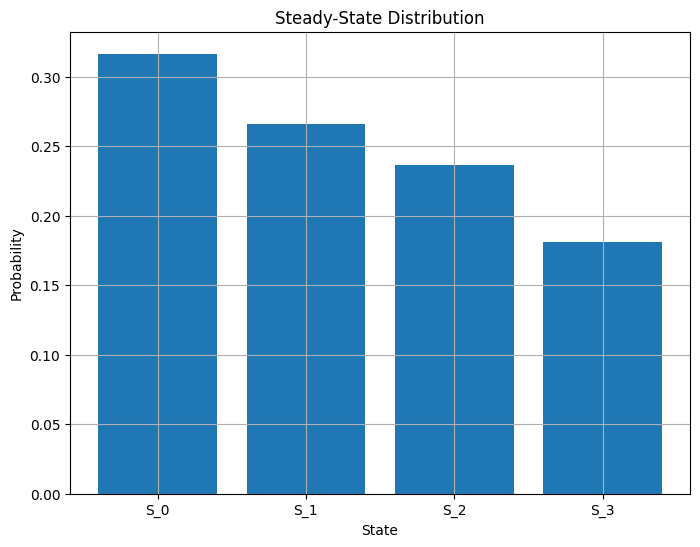

Steady-state distribution:
[0.31658291 0.26633166 0.2361809  0.18090452]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Transition matrix
P = np.array([
    [0.7, 0.1, 0.1, 0.1],
    [0.2, 0.5, 0.1, 0.2],
    [0.1, 0.2, 0.6, 0.1],
    [0.1, 0.3, 0.2, 0.4]
])

# Initial state distribution
X_0 = np.array([0.4, 0.3, 0.2, 0.1])

# Function to evolve state
def evolve_state(X, P, steps):
    state_history = [X]
    for _ in range(steps):
        X = np.dot(X, P)
        state_history.append(X)
    return np.array(state_history)

# Evolve the state for 10 time steps
steps = 10
state_history = evolve_state(X_0, P, steps)

# Find steady-state distribution
eigenvalues, eigenvectors = np.linalg.eig(P.T)
steady_state = eigenvectors[:, np.isclose(eigenvalues, 1)]

# Normalize the steady-state distribution
steady_state = steady_state / np.sum(steady_state)
steady_state = steady_state.real

# Plot the state distributions over time
plt.figure(figsize=(12, 6))
for i in range(state_history.shape[1]):
    plt.plot(range(steps + 1), state_history[:, i], label=f'State S_{i}')

plt.xlabel('Time Steps')
plt.ylabel('Probability')
plt.title('State Distributions Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the steady-state distribution
plt.figure(figsize=(8, 6))
plt.bar(range(steady_state.size), steady_state.flatten(), tick_label=[f'S_{i}' for i in range(steady_state.size)])
plt.xlabel('State')
plt.ylabel('Probability')
plt.title('Steady-State Distribution')
plt.grid(True)
plt.show()

print("Steady-state distribution:")
print(steady_state.flatten())
